https://www.bgc-jena.mpg.de/wetter/

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [2]:
# import required libraries

# data preprocessing
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

# visualization
from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (15.0, 6.0)


# ignore warnings
import warnings
warnings.filterwarnings('ignore')



### Data Preprocessing

In [3]:
data = pd.read_csv("mpi_roof\mpi_roof.csv",encoding= 'unicode_escape')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31931 entries, 0 to 31930
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date Time             31931 non-null  object 
 1   p (mbar)              31931 non-null  float64
 2   T (degC)              31931 non-null  float64
 3   Tpot (K)              31931 non-null  float64
 4   Tdew (degC)           31931 non-null  float64
 5   rh (%)                31931 non-null  float64
 6   VPmax (mbar)          31931 non-null  float64
 7   VPact (mbar)          31931 non-null  float64
 8   VPdef (mbar)          31931 non-null  float64
 9   sh (g/kg)             31931 non-null  float64
 10  H2OC (mmol/mol)       31931 non-null  float64
 11  rho (g/m**3)          31931 non-null  float64
 12  wv (m/s)              31931 non-null  float64
 13  max. wv (m/s)         31931 non-null  float64
 14  wd (deg)              31931 non-null  float64
 15  rain (mm)          

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,...,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000,31931.000000
mean,990.646484,10.966426,284.885015,6.840672,79.511083,15.146275,10.647325,4.498847,6.718122,10.750479,...,2.057666,3.385259,172.644516,0.009580,31.957032,106.328058,208.339513,250.871895,19.939707,424.905399
std,8.268963,8.751587,8.807894,6.027105,19.419032,8.942102,4.077635,6.807391,2.587192,4.123436,...,1.448510,2.203478,83.729286,0.167079,123.946813,193.646628,376.554554,479.030428,8.154881,303.832296
min,955.430000,-13.390000,259.340000,-14.190000,14.230000,2.170000,2.030000,0.000000,1.260000,2.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.410000,-9999.000000
25%,985.930000,4.610000,278.640000,2.890000,68.700000,8.490000,7.520000,0.290000,4.730000,7.590000,...,0.990000,1.750000,119.500000,0.000000,0.000000,0.000000,0.000000,0.000000,13.630000,420.100000
50%,991.160000,11.070000,285.160000,7.330000,84.200000,13.200000,10.250000,1.820000,6.470000,10.360000,...,1.710000,2.850000,195.100000,0.000000,0.000000,0.000000,0.000000,0.000000,19.150000,430.100000
75%,995.540000,17.025000,290.870000,11.465000,96.200000,19.435000,13.560000,5.580000,8.550000,13.680000,...,2.740000,4.490000,224.950000,0.000000,0.000000,121.430000,241.275000,288.995000,25.195000,444.300000
max,1014.630000,37.950000,312.210000,19.720000,100.000000,66.130000,23.010000,56.720000,14.670000,23.380000,...,12.810000,17.820000,360.000000,19.200000,600.000000,1044.180000,2026.210000,2485.400000,45.800000,530.200000


In [4]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2022 00:10:00,984.33,22.42,296.91,19.72,84.7,27.17,23.01,4.16,14.67,...,1.18,1.63,219.9,0.0,0,0.0,0.0,0.0,31.74,447.2
1,01.07.2022 00:20:00,984.36,22.02,296.50,19.72,86.8,26.51,23.01,3.50,14.67,...,1.02,1.58,222.4,0.0,0,0.0,0.0,0.0,31.63,445.6
2,01.07.2022 00:30:00,984.35,21.77,296.25,19.68,87.9,26.11,22.95,3.16,14.63,...,0.99,1.64,191.0,0.0,0,0.0,0.0,0.0,31.52,443.1
3,01.07.2022 00:40:00,984.27,22.00,296.49,19.47,85.6,26.48,22.67,3.81,14.45,...,1.45,2.40,211.8,0.0,0,0.0,0.0,0.0,31.44,443.4
4,01.07.2022 00:50:00,984.36,22.23,296.71,19.40,84.0,26.86,22.56,4.30,14.38,...,1.66,2.59,211.9,0.0,0,0.0,0.0,0.0,31.37,444.4


In [5]:
data["Date"] = pd.to_datetime(data["Date Time"])

# data["Date"] = data["Date Time"].astype("datetime64[ns]")
data["Date"].shape

(31930,)

In [6]:
data.set_index("Date Time",inplace=True)
data.drop("Date",axis=1,inplace=True)
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
01.07.2022 00:10:00,984.33,22.42,296.91,19.72,84.7,27.17,23.01,4.16,14.67,23.38,...,1.18,1.63,219.9,0.0,0,0.0,0.0,0.0,31.74,447.2
01.07.2022 00:20:00,984.36,22.02,296.50,19.72,86.8,26.51,23.01,3.50,14.67,23.38,...,1.02,1.58,222.4,0.0,0,0.0,0.0,0.0,31.63,445.6
01.07.2022 00:30:00,984.35,21.77,296.25,19.68,87.9,26.11,22.95,3.16,14.63,23.32,...,0.99,1.64,191.0,0.0,0,0.0,0.0,0.0,31.52,443.1
01.07.2022 00:40:00,984.27,22.00,296.49,19.47,85.6,26.48,22.67,3.81,14.45,23.03,...,1.45,2.40,211.8,0.0,0,0.0,0.0,0.0,31.44,443.4
01.07.2022 00:50:00,984.36,22.23,296.71,19.40,84.0,26.86,22.56,4.30,14.38,22.92,...,1.66,2.59,211.9,0.0,0,0.0,0.0,0.0,31.37,444.4


In [7]:
# feature selection
data_selected = data.iloc[:, [0,1,4,8,16,20]]
display(data_selected.head())

,p (mbar),T (degC),rh (%),sh (g/kg),SWDR (W/m²),CO2 (ppm)
Date Time,,,,,,
01.07.2022 00:10:00,984.33,22.42,84.7,14.67,0.0,447.2
01.07.2022 00:20:00,984.36,22.02,86.8,14.67,0.0,445.6
01.07.2022 00:30:00,984.35,21.77,87.9,14.63,0.0,443.1
01.07.2022 00:40:00,984.27,22.00,85.6,14.45,0.0,443.4
01.07.2022 00:50:00,984.36,22.23,84.0,14.38,0.0,444.4


In [8]:
col_names = list(data_selected.columns)
colors = ['b','g','r','c','m','y']

In [9]:
n_features=6
n_steps_in=50
n_steps_out=20

### Scaling & Anomaly detection

In [10]:
# scale data
# scaler = MinMaxScaler(feature_range=(-1,1))
# data_scaled = scaler.fit_transform(data_selected)


In [11]:
# train and test split
data_array=np.array(data_selected)
test_size = 1010
train = data_array[:-test_size,:]
test = data_array[-test_size:,:]


In [12]:
print(train.shape)
print(test.shape)

(30920, 6)
(1010, 6)


In [13]:
def plot_histogram(y,x,train,column_names,colors):
    plt.figure(figsize=(20,20))
    for i in range(train.shape[1]):
        plt.subplot(y,x,i+1)
        plt.hist(train[:,i],color=colors[i])
        plt.title(col_names[i])

    plt.show()

In [14]:
def plot_boxplot(y,x,train,column_names,colors):
    plt.figure(figsize=(20,20))
    for i in range(train.shape[1]):
        plt.subplot(y,x,i+1)
        plt.boxplot(train[:,i])
        plt.title(col_names[i])

    plt.show()

In [15]:
# plot_histogram(3,2,train,col_names,colors)

In [16]:
# plot_boxplot(3,2,train,col_names,colors)

In [17]:
def remove_anomaly(train,index,anomaly_idx_list):
    offset=100
    for i in range(len(anomaly_idx_list)):
        size = 0
        mean = 0
        for j in range(anomaly_idx_list[i]-offset,anomaly_idx_list[i]+offset+1):
            if(train.shape[0]-(offset+1)>=j>=0 and j not in anomaly_idx_list ):
                size += 1
                mean += train[j,index]
#         print(mean/size)
        if size != 0:
            train[anomaly_idx_list[i],index] = mean/size
    return train

In [18]:
# isolation_forest = IsolationForest(contamination=0.01)

# for idx in range(train.shape[1]):
#     dt_feature = [[item] for item in train[:,idx]]
#     isolation_forest.fit(dt_feature)
#     pred = isolation_forest.predict(dt_feature)
#     anomaly = [i for i in range(len(pred)) if pred[i] == -1]
    
#     train = remove_anomaly(train,idx,anomaly)
    
#     anomaly_val = []
#     for i in range(len(anomaly)):
#         anomaly_val.append(dt_feature[anomaly[i]])
#     plt.plot(dt_feature,color='b')
#     plt.title(col_names[idx])
#     plt.scatter(anomaly,anomaly_val,color='r')
#     plt.legend(['original','anomaly'], loc='upper right')
#     plt.show()



In [19]:
# plot_boxplot(3,2,train,col_names,colors)

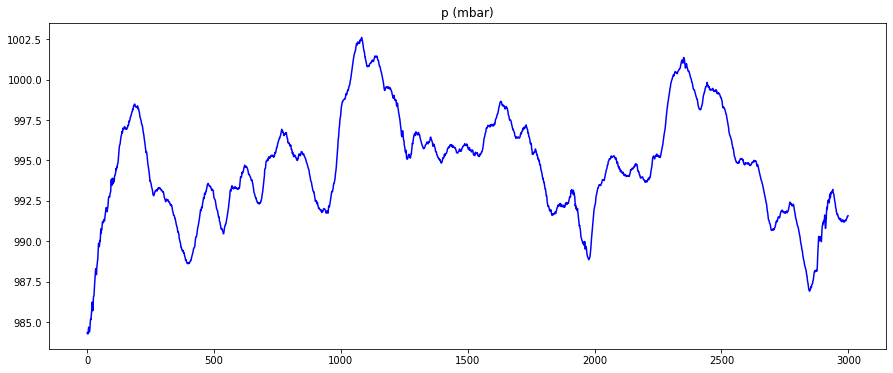

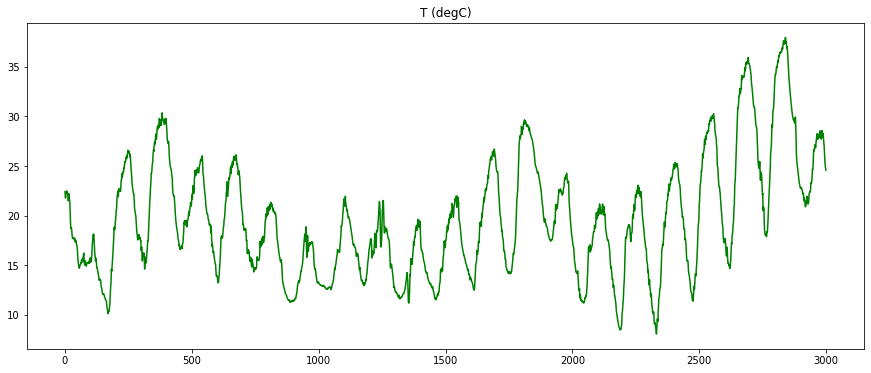

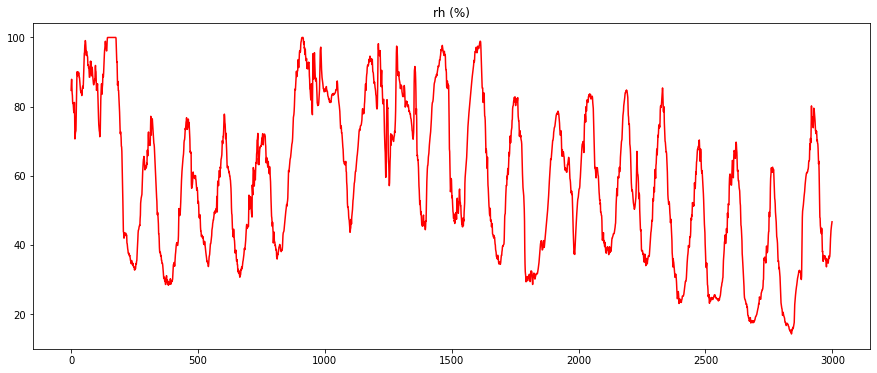

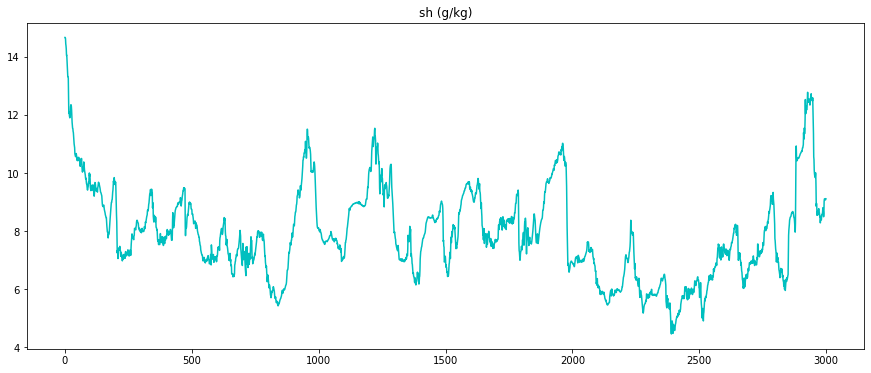

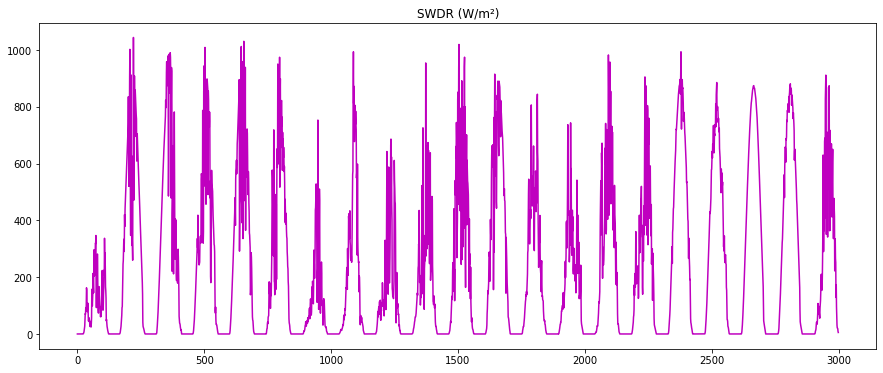

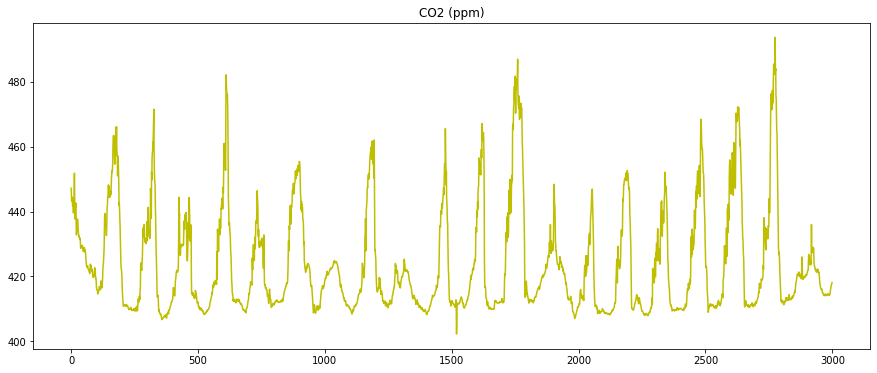

In [20]:
# for i in range(train.shape[1]):
#     plt.plot(train[:3000,i],color=colors[i])
#     plt.title(col_names[i])
#     plt.show()

In [21]:
# for i in range(test.shape[1]):
#     plt.plot(test[:,i],color=colors[i])
#     plt.title(col_names[i])
#     plt.show()

### Identifying Stationarity

In [21]:
# check stationarity std and mean
for i in range(n_features):
    print("{:<20} mean: {:<20} variance: {:<20}".format(col_names[i],np.mean(train[:,i]),np.var(train[:,i])))

p (mbar)             mean: 990.2191345407502    variance: 61.719762601562444  
T (degC)             mean: 11.288156856403623   variance: 75.34897046116579   
rh (%)               mean: 79.22563906856404    variance: 383.4836818490299   
sh (g/kg)            mean: 6.817095407503234    variance: 6.5773282418676535  
SWDR (W/m²)          mean: 108.48408117723157   variance: 38344.826283864684  
CO2 (ppm)            mean: 424.5785058214748    variance: 95322.20939505073   


In [22]:
# split data set into chunk and calculate mean and std
for i in range(n_features):
    chunk = np.split(train[:,i], indices_or_sections=10)
    print("{:^75}\n\nmean: {}\n\nvariance: {}".format(col_names[i],np.mean(chunk,axis=1),np.var(chunk,axis=1)))
    print("---------------------------------------------------------------------")

                                 p (mbar)                                  

mean: [994.63727684 992.38136158 989.59104787 988.59766171 989.57018111
 992.28054657 988.15962807 989.62546248 987.9425194  989.40565977]

variance: [ 10.7522237   17.81019676  19.56834237  31.78650608  81.4973402
  28.5934606  104.64508178  52.9410568   44.61509129 182.66016105]
---------------------------------------------------------------------
                                 T (degC)                                  

mean: [19.67312743 21.13050453 19.73922057 14.03266818 11.52739974 12.45497736
  5.38193079 -1.31631953  8.50964748  1.74841203]

variance: [34.42572298 28.93126508 19.49485272 23.41010009 16.56734563 20.00816161
 26.70390717 17.89630269 10.51939577 15.49840708]
---------------------------------------------------------------------
                                  rh (%)                                   

mean: [59.30983182 55.48353169 71.20894567 82.65258732 83.62888745 85.14352846
 89.1

In [22]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
for i in range(n_features):
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(train[:,i])
    print("{:<20s} adf: {:<20} pvalue: {:<20}".format(col_names[i],adf,pvalue))

p (mbar)             adf: -6.9334965369990265  pvalue: 1.0691592840419731e-09
T (degC)             adf: -5.973273239456936   pvalue: 1.9137403394588512e-07
rh (%)               adf: -12.557742605913148  pvalue: 2.1358464829752145e-23
sh (g/kg)            adf: -5.302313737256167   pvalue: 5.41554846291912e-06
SWDR (W/m²)          adf: -26.644242794181473  pvalue: 0.0                 
CO2 (ppm)            adf: -23.360080410613122  pvalue: 0.0                 


1. If **p value** is high, data is nonstationary. It should be less than 0.05
2. **Adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary.

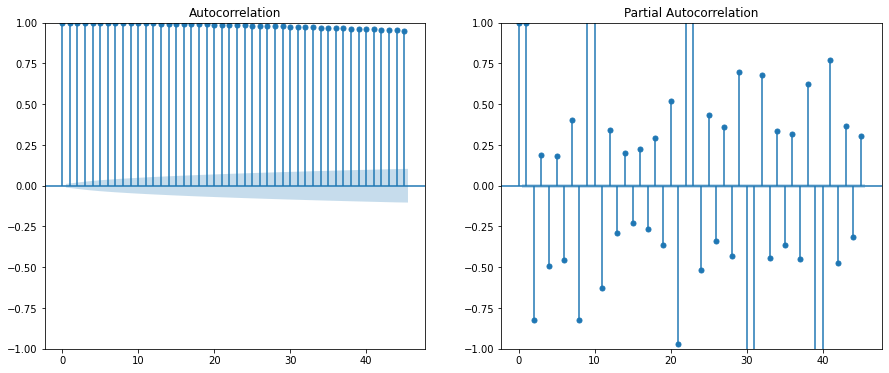

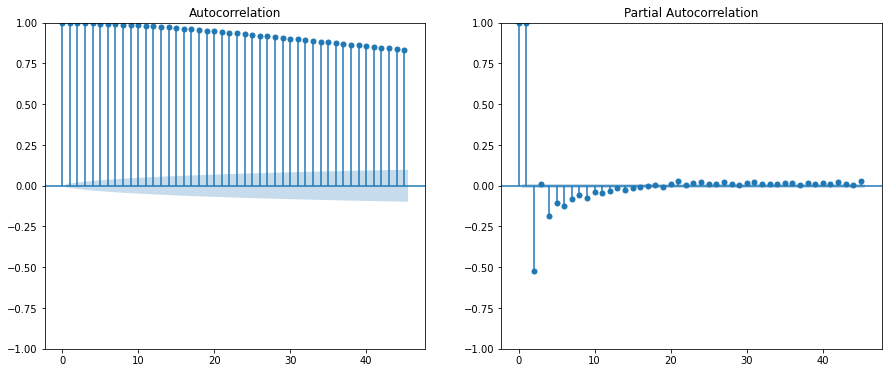

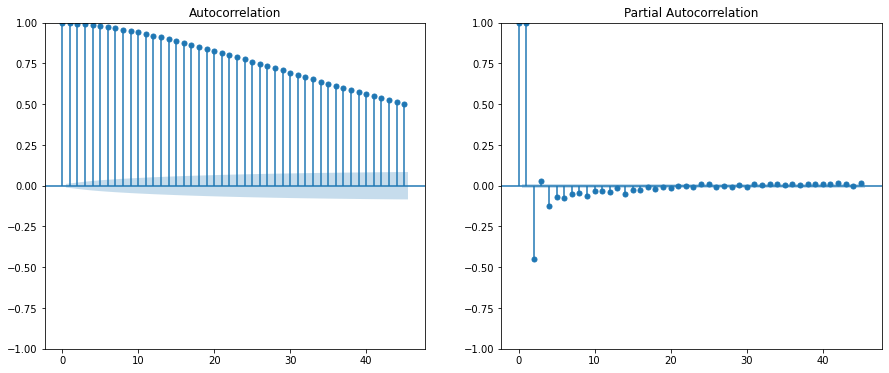

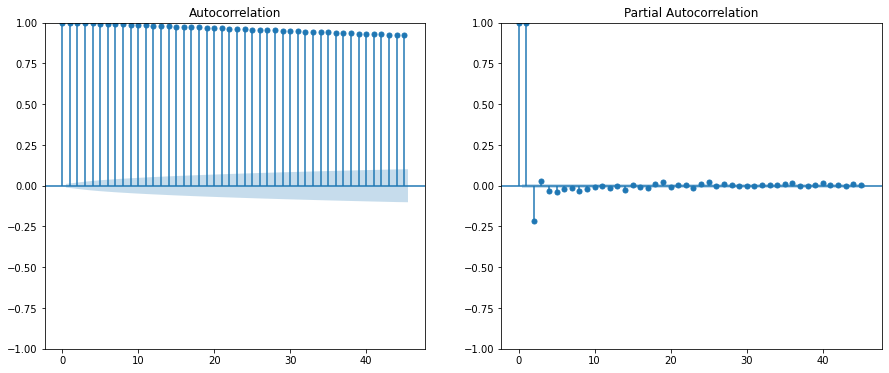

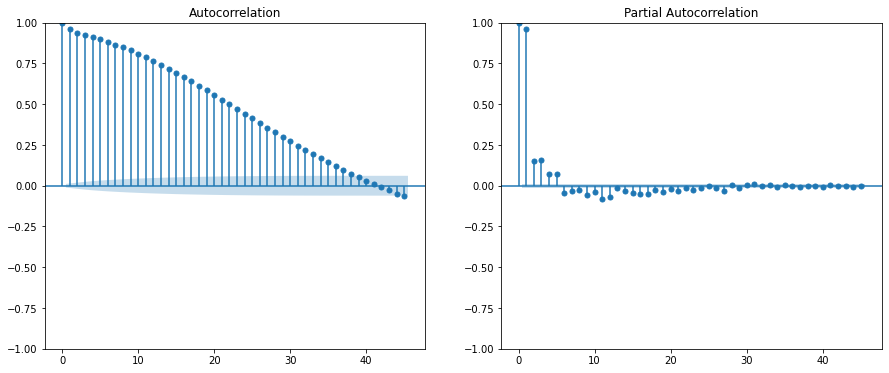

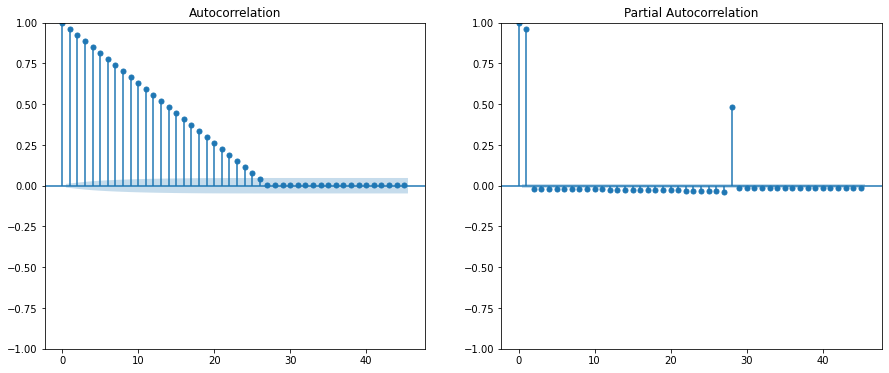

In [24]:
# plot autocorrelation  and partial autocorrelation  graphs
# autocorrelation is for optimal d, partial autocorrelation is for optimal p
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# def plot_acf_pacf(train):
#     for i in range(train.shape[1]):
#         fig, axes = plt.subplots(1, 2, sharex=True)
#         plot_acf(train[:,i], ax=axes[0])
#         plot_pacf(train[:,i], ax=axes[1])
#     plt.show()
# plot_acf_pacf(train)

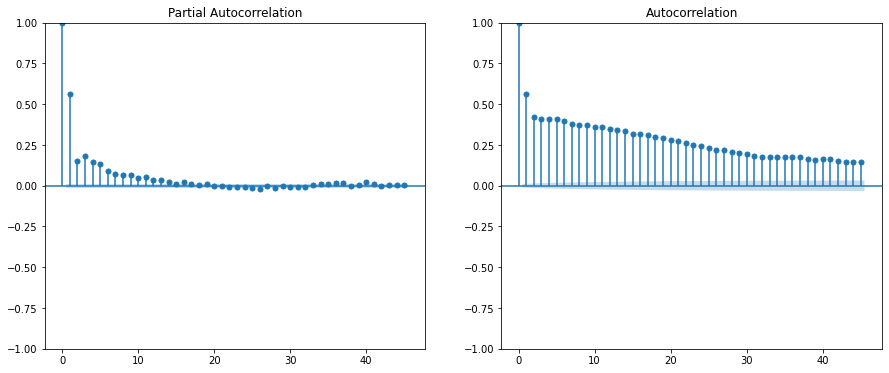

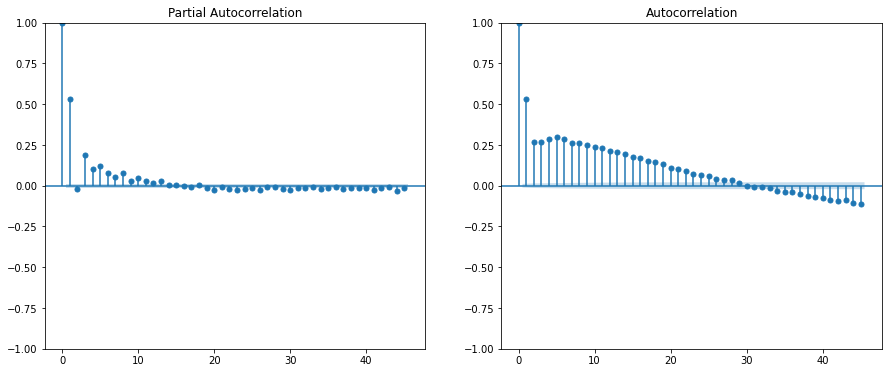

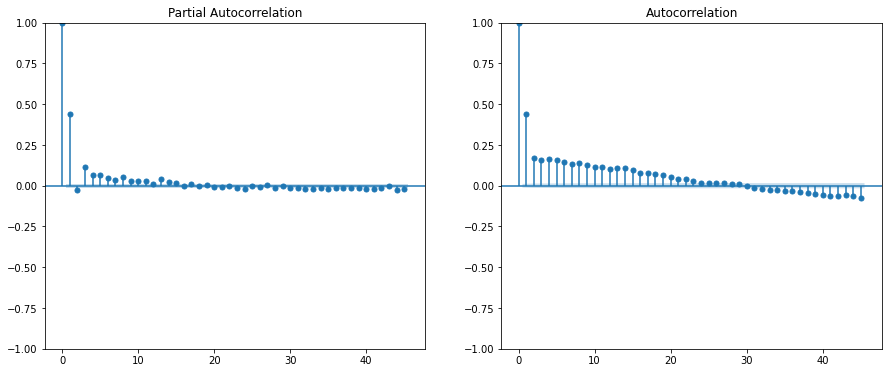

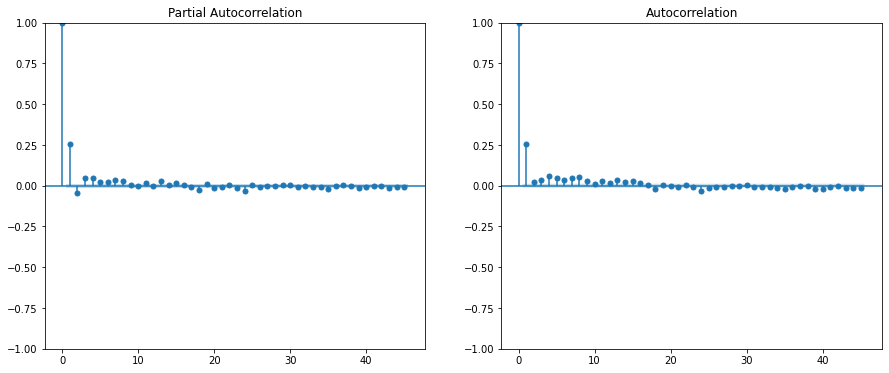

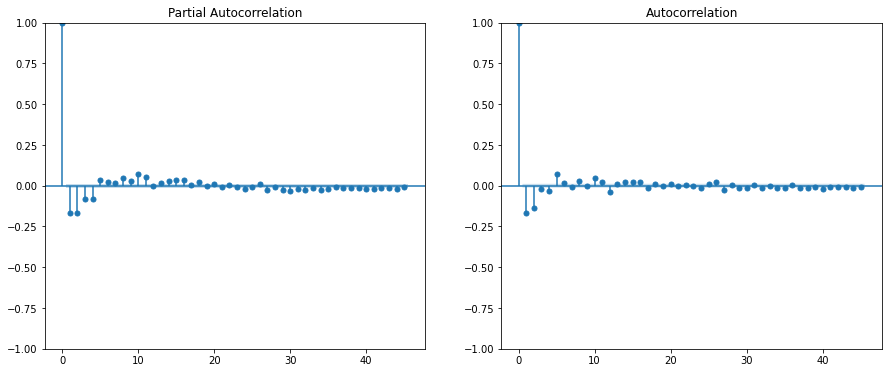

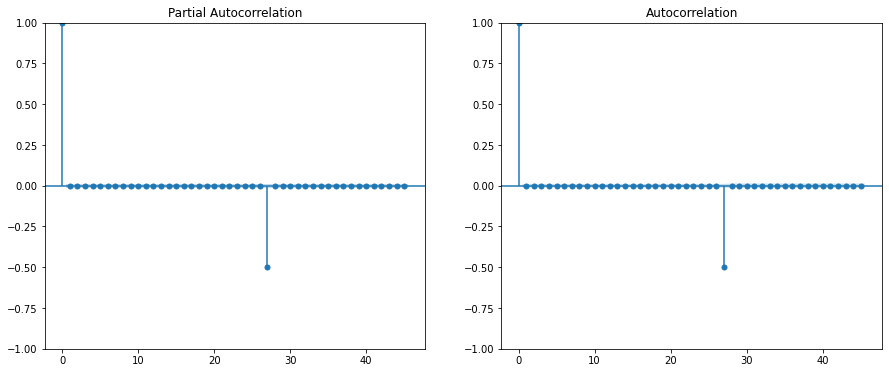

In [25]:
# difference
def optimal_d(train):
    for i in range(train.shape[1]):
        fig, axes = plt.subplots(1, 2, sharex=True)
        plot_pacf(np.diff(train[:,i]), ax=axes[0])
        plot_acf(np.diff(train[:,i]), ax=axes[1])
#         plot_pacf(np.diff(np.diff(train[:,i])), ax=axes[2])
#         plot_acf(np.diff(np.diff(train[:,i])), ax=axes[3])
        
    plt.show()
optimal_d(train)

### Arima Model Implementation & Prediction

In [42]:
from pmdarima import auto_arima
# pressure
model_p = auto_arima(y=train[:,0],X=train[:,1:],seasonal=False,out_of_sample_size=20,max_p=10,max_q=10)
model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                30920
Model:               SARIMAX(5, 1, 5)   Log Likelihood               37488.800
Date:                Fri, 17 Mar 2023   AIC                         -74945.601
Time:                        13:41:46   BIC                         -74812.175
Sample:                             0   HQIC                        -74902.851
                              - 30920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0672      0.004    -17.006      0.000      -0.075      -0.059
x2            -0.0080      0.001    -10.118      0.000      -0.010      -0.006
x3             0.0881      0.006     14.847      0.000       0.077       0.100
x4          -9.07e-05   4.89e-06    -18.546      0.000      -0.000   -8.11e-05
x5         -5.581e-06   5.28e-06     -1.058      0.290   -1.59e-05    4.76e-06
ar.L1          0.3478      4.489      0.077      0.938      -8.451       9.147
ar.L2          0.0261      4.759      0.005      0.996      -9.301       9.354
ar.L3          0.1027      3.193      0.032      0.974      -6.155       6.360
ar.L4          0.4328      2.565      0.169      0.866      -4.594       5.460
ar.L5          0.0379      0.218      0.174      0.862      -0.390       0.466
ma.L1          0.0141      4.489      0.003      0.997      -8.785       8.813
ma.L2         -0.0196      3.136     -0.006      0.995      -6.166       6.127
ma.L3         -0.0343      2.066     -0.017      0.987      -4.084       4.016
ma.L4         -0.3844      1.486     -0.259      0.796      -3.296       2.527
ma.L5         -0.1119      0.718     -0.156      0.876      -1.520       1.296
sigma2         0.0052   1.36e-05    378.907      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):          14512515.51
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             1.11
Prob(H) (two-sided):                  0.45   Kurtosis:                       109.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model_p.fit(train[:,0],X=train[:,1:])

In [ ]:
forecast_p,conf_int=model_p.predict(n_periods=len(test),X=test[:,1:],return_conf_int=True)
print("Mean squared error: ",mean_squared_error(forecast_p,test[:,0]))
print(forecast_p)

Mean squared error:  447.6668282500529
[988.14934993 988.07326365 988.00107152 ... 984.94087841 984.94087841
 984.94087841]


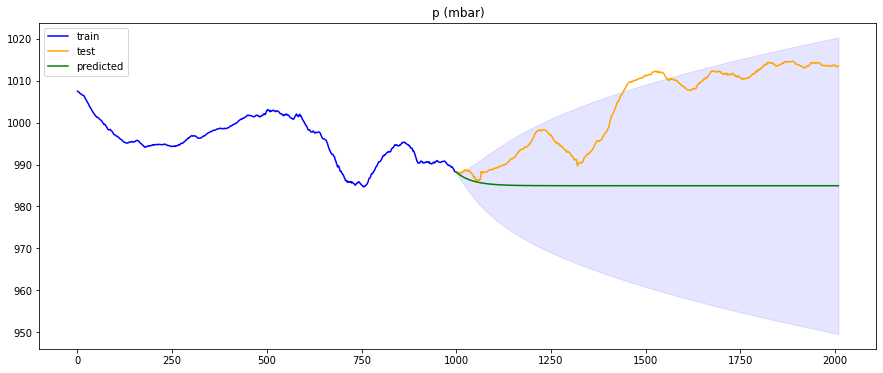

In [ ]:
train_range=1000
plt.plot(range(train_range),train[-train_range:,0],color='blue')
plt.plot(range(train_range,train_range+test_size),test[:,0],color='orange')
plt.plot(range(train_range,train_range+test_size),forecast_p,color='green')
plt.fill_between(range(train_range,train_range+test_size),
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.legend(["train","test","predicted"])
plt.title(col_names[0])
plt.show()

In [30]:
# temparature
model_temp = auto_arima(train[:,1],seasonality=True,out_of_sample_size=20)
model_temp

ARIMA(order=(5, 1, 1), out_of_sample_size=20, scoring_args={},
      suppress_warnings=True, with_intercept=False)

In [31]:
model_temp.fit(train[:,1])
forecast_temp = model_temp.predict(n_periods=test_size)

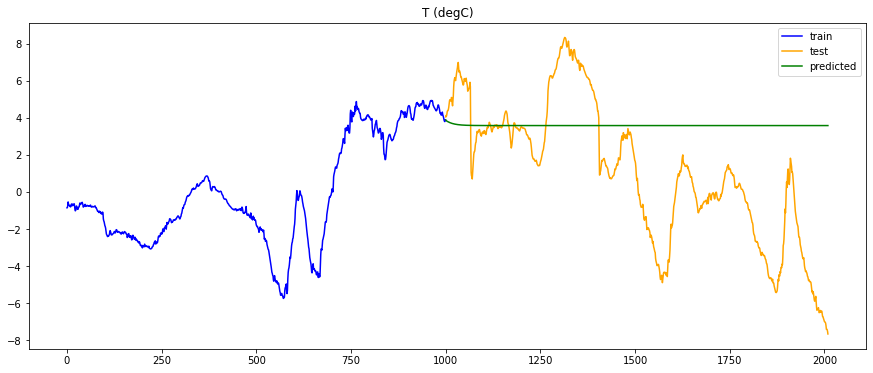

In [32]:
plt.plot(range(train_range),train[-train_range:,1],color='blue')
plt.plot(range(train_range,train_range+test_size),test[:,1],color='orange')
plt.plot(range(train_range,train_range+test_size),forecast_temp,color='green')
plt.legend(["train","test","predicted"])
plt.title(col_names[1])
plt.show()

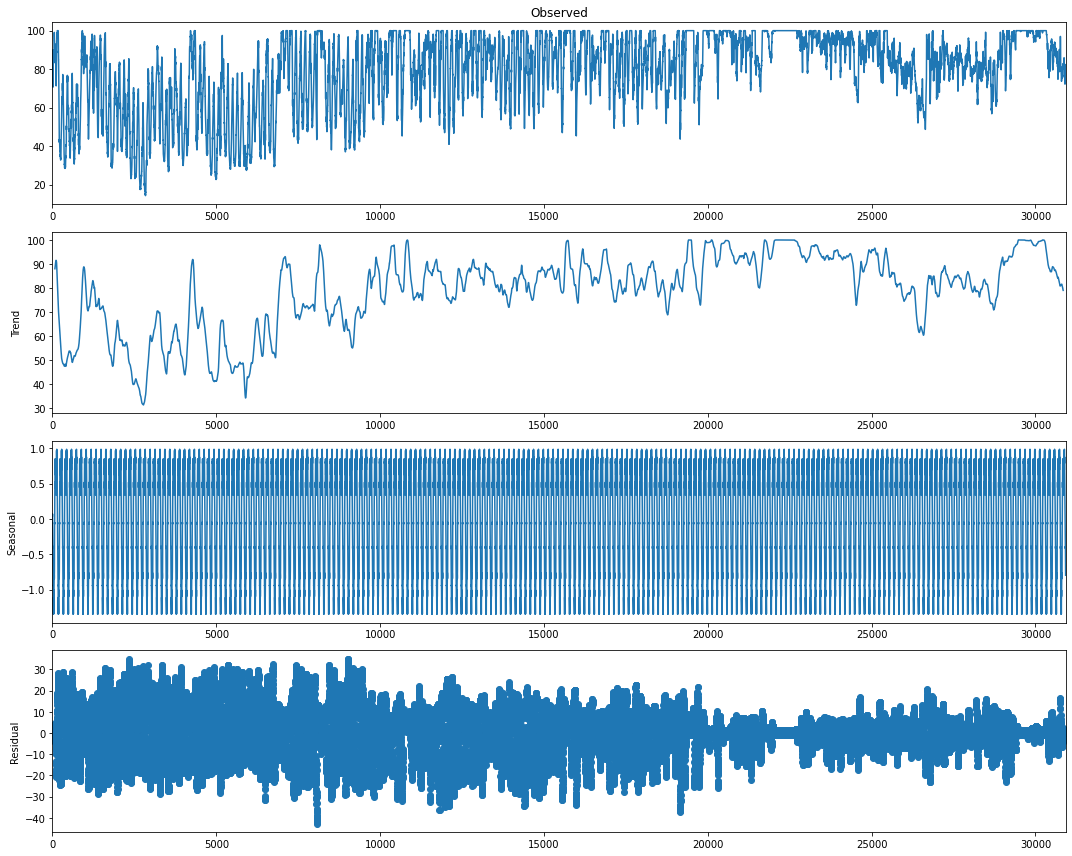

In [33]:
# rh
from statsmodels.tsa.seasonal import seasonal_decompose
fig=seasonal_decompose(train[:,2],period=150).plot()
fig.set_size_inches((15, 12))
fig.tight_layout()

In [34]:
model_rh = auto_arima(train[:,2],seasonality=True,stationary=False,out_of_sample_size=20)
model_rh

ARIMA(order=(1, 1, 2), out_of_sample_size=20, scoring_args={},
      suppress_warnings=True, with_intercept=False)

In [35]:
model_rh.fit(train[:,2])
forecast_rh = model_rh.predict(n_periods=test_size)

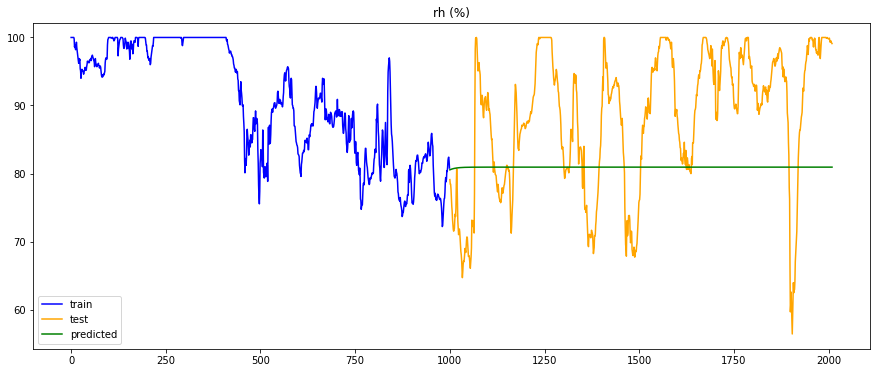

In [36]:
plt.plot(range(train_range),train[-train_range:,2],color='blue')
plt.plot(range(train_range,train_range+test_size),test[:,2],color='orange')
plt.plot(range(train_range,train_range+test_size),forecast_rh,color='green')
plt.legend(["train","test","predicted"])
plt.title(col_names[2])
plt.show()